In [11]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census


In [2]:
# Creating list of car makes, and testing list of all models for specific make

car_prices_csv = "prices_clean.csv"
car_prices_df = pd.read_csv(car_prices_csv)
# car_prices_df.head()
# print(car_prices_df.count())
car_makes = car_prices_df["make"].unique()
# print(car_makes)
honda_df = car_prices_df.loc[car_prices_df["make"]==car_makes[0]]
print(honda_df)
# honda_most_exp = honda_df.loc[honda_df["price"] == honda_df["price"].max()]
# honda_least_exp = honda_df.loc[honda_df["price"] == honda_df["price"].min()]
# print(honda_least_exp["model"].iloc[0])
# print(honda_most_exp)
# print(honda_least_exp)
test = honda_df["price"].loc[honda_df["model"]=="Elevate"].iloc[0]
print(test)

    year   make                        model    price
0   2023  Honda                      Elevate  14530.0
1   2023  Honda                            e  37140.0
2   2023  Honda                    e Advance  37140.0
3   2023  Honda              Pilot Elite AWD  52030.0
4   2023  Honda   Pilot EX-L 8-Passenger AWD  42310.0
5   2023  Honda   Pilot EX-L 8-Passenger 2WD  41950.0
6   2023  Honda              Pilot Sport 4WD  40080.0
7   2023  Honda                  City ZX CVT  19350.0
8   2023  Honda                   City V CVT  16510.0
9   2023  Honda        New City ZX Petrol MT  17880.0
10  2023  Honda        New City VX Petrol MT  16400.0
11  2023  Honda          City Hybrid eHEV ZX  24770.0
12  2023  Honda           City Hybrid eHEV V  22970.0
13  2023  Honda         New City V Petrol MT  15030.0
14  2023  Honda        New City SV Petrol MT  14010.0
15  2023  Honda           City Hybrid ZX CVT  28520.0
16  2023  Honda            City Hybrid V CVT  26450.0
17  2023  Honda             

In [3]:
# Function to calculate monthly car payment
def monthly_pay(p,r,n):
    # p = Principal
    # r = Interest rate/12
    r = r/12
    # n = Loan term (months)
    return (p/((pow(1+r,n)-1)/(r*pow(1+r,n))))

# Assume 72 month (6-year) car loan term
# Assume 9.09% APR (Estimate based on credit rating 660-719)

# Principal
p = 20500
# Interest rate
r = 0.09
# Loan term (months)
n = 72
monthly_payment = monthly_pay(p,r,n)
monthly_payment

369.52351194957026

In [4]:
# Testing Monthly Payment Budget and Monthly Payment

# Assume average annual_income: $65k
# Assume 10% of monthly income budgeted for car payment
annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1
print(f"Monthly payment budget: {monthly_payment_budget}")

principal = honda_df["price"].loc[honda_df["model"]=="Elevate"].iloc[0]
interest_rate = 0.0909
loan_term = 72
monthly_payment = monthly_pay(principal,interest_rate,loan_term)
print(f"Monthly payment for Honda Elevate: {monthly_payment}")

Monthly payment budget: 541.6666666666667
Monthly payment for Honda Elevate: 262.5605489178993


In [8]:
# Function to create Dataframe of affordable models for specific make

def afford_models_for_make(make,monthly_payment_budget):
    models_df = car_prices_df.loc[car_prices_df["make"]==make]
    models_list = models_df.loc[monthly_pay(models_df["price"],interest_rate,loan_term) < monthly_payment_budget]
    return models_list

annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1

test = afford_models_for_make(car_makes[0],monthly_payment_budget)
print(test)

    year   make                  model    price
0   2023  Honda                Elevate  14530.0
7   2023  Honda            City ZX CVT  19350.0
8   2023  Honda             City V CVT  16510.0
9   2023  Honda  New City ZX Petrol MT  17880.0
10  2023  Honda  New City VX Petrol MT  16400.0
11  2023  Honda    City Hybrid eHEV ZX  24770.0
12  2023  Honda     City Hybrid eHEV V  22970.0
13  2023  Honda   New City V Petrol MT  15030.0
14  2023  Honda  New City SV Petrol MT  14010.0
15  2023  Honda     City Hybrid ZX CVT  28520.0
16  2023  Honda      City Hybrid V CVT  26450.0
17  2023  Honda                 City V  17500.0
18  2023  Honda                City SV  16260.0
19  2023  Honda            City Hybrid  26640.0
20  2023  Honda             HR-V VTi-S  28230.0
21  2023  Honda               HR-V VTi  27470.0
22  2023  Honda              Accord EX  29610.0
30  2023  Honda      Civic Sport Sedan  24650.0
32  2023  Honda           Accord Sedan  28000.0
33  2023  Honda                   ZR-V  

In [9]:
# Function to calculate and create Dataframe of percentage affordable of all cars
def percent_afford_per_make(interest_rate,loan_term,monthly_payment_budget,car_makes):
    cars_percent_affordable = []

    for car in car_makes:
        car_df = car_prices_df.loc[car_prices_df["make"]==car]
        car_models = car_df.loc[monthly_pay(car_df["price"],interest_rate,loan_term) < monthly_payment_budget]
        percent_affordable = 100*(car_models.count()["model"])/(car_df.count()["model"])
        cars_percent_affordable.append(percent_affordable)

    # print(cars_percent_affordable)

    affordable_cars = {
        "Car Make":car_makes,
        "Percent Affordable":cars_percent_affordable
    }

    affordable_cars_df = pd.DataFrame(affordable_cars)
    return affordable_cars_df


# Assumptions:
#   9.09% APR (Estimate based on credit rating 660-719)
#   72 month (6-year) car loan term
#   $65k average annual income
#   10% of monthly income budgeted for car payment

interest_rate = 0.0909
loan_term = 72

annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1

# print(car_makes)

test = percent_afford_per_make(interest_rate,loan_term,monthly_payment_budget,car_makes)
test

,Car Make,Percent Affordable
0,Honda,58.823529
1,BMW,0.000000
2,Lexus,0.000000
3,Hyundai,52.173913
4,Toyota,42.500000
5,KIA,32.142857
6,Nissan,18.181818
7,Audi,0.000000
8,Chevrolet,20.000000
9,Ford,6.976744


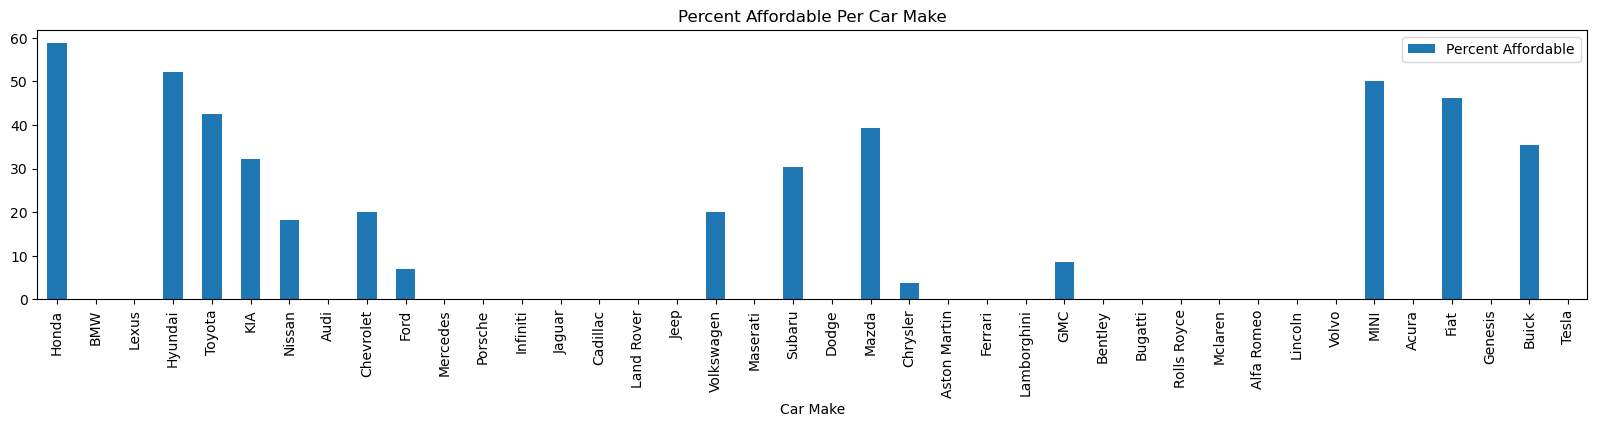

<Figure size 640x480 with 0 Axes>

In [12]:
interest_rate = 0.0909
loan_term = 72

annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1

# print(car_makes)

percent_afford_df = percent_afford_per_make(interest_rate,loan_term,monthly_payment_budget,car_makes)
percent_afford_df = percent_afford_df.set_index("Car Make")
percent_afford_df.head()

# Use DataFrame.plot() in order to create a bar chart of the data
percent_afford_df.plot(kind="bar", figsize=(20,3.5))

# Set a title for the chart
plt.title("Percent Affordable Per Car Make")

plt.show()
plt.tight_layout()
